In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, normaltest
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("./data/car_price_prediction.csv")
print(df.head())
print(df.info())

         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km       6.00   
1               No    Petrol             3  192000 km       6.00   
2               No    Petrol           1.3  200000 km       4.00   
3              Yes    Hybrid           2.5  168966 km       4.00   
4              Yes    Petrol           1.3   91901 km       4.00   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1   

In [32]:
df.columns = [col.strip().replace(' ', '_').replace('.', '').lower() for col in df.columns]
print(df.head())
print(df.info())


         id  price  levy manufacturer    model  prod_year   category  \
0  45654403  13328  1399        LEXUS   RX 450       2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox       2011       Jeep   
2  45774419   8467     -        HONDA      FIT       2006  Hatchback   
3  45769185   3607   862         FORD   Escape       2011       Jeep   
4  45809263  11726   446        HONDA      FIT       2014  Hatchback   

  leather_interior fuel_type engine_volume    mileage  cylinders  \
0              Yes    Hybrid           3.5  186005 km       6.00   
1               No    Petrol             3  192000 km       6.00   
2               No    Petrol           1.3  200000 km       4.00   
3              Yes    Hybrid           2.5  168966 km       4.00   
4              Yes    Petrol           1.3   91901 km       4.00   

  gear_box_type drive_wheels   doors             wheel   color  airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tipt

In [33]:
print(df.isnull().sum())
print(df['leather_interior'].unique())

id                  0
price               0
levy                0
manufacturer        0
model               0
prod_year           0
category            0
leather_interior    0
fuel_type           0
engine_volume       0
mileage             0
cylinders           0
gear_box_type       0
drive_wheels        0
doors               0
wheel               0
color               0
airbags             0
dtype: int64
['Yes' 'No']


In [34]:
print(df.columns.tolist())
# df = df.drop(['id'], axis=1)
print(df.head())


['id', 'price', 'levy', 'manufacturer', 'model', 'prod_year', 'category', 'leather_interior', 'fuel_type', 'engine_volume', 'mileage', 'cylinders', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color', 'airbags']
         id  price  levy manufacturer    model  prod_year   category  \
0  45654403  13328  1399        LEXUS   RX 450       2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox       2011       Jeep   
2  45774419   8467     -        HONDA      FIT       2006  Hatchback   
3  45769185   3607   862         FORD   Escape       2011       Jeep   
4  45809263  11726   446        HONDA      FIT       2014  Hatchback   

  leather_interior fuel_type engine_volume    mileage  cylinders  \
0              Yes    Hybrid           3.5  186005 km       6.00   
1               No    Petrol             3  192000 km       6.00   
2               No    Petrol           1.3  200000 km       4.00   
3              Yes    Hybrid           2.5  168966 km       4.00   
4       

In [35]:
print(df['leather_interior'].unique())
df['leather_interior'] = df['leather_interior'].map({'Yes': 1, 'No': 0})
print(df.head())
print(df['leather_interior'].unique())

['Yes' 'No']
         id  price  levy manufacturer    model  prod_year   category  \
0  45654403  13328  1399        LEXUS   RX 450       2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox       2011       Jeep   
2  45774419   8467     -        HONDA      FIT       2006  Hatchback   
3  45769185   3607   862         FORD   Escape       2011       Jeep   
4  45809263  11726   446        HONDA      FIT       2014  Hatchback   

   leather_interior fuel_type engine_volume    mileage  cylinders  \
0                 1    Hybrid           3.5  186005 km       6.00   
1                 0    Petrol             3  192000 km       6.00   
2                 0    Petrol           1.3  200000 km       4.00   
3                 1    Hybrid           2.5  168966 km       4.00   
4                 1    Petrol           1.3   91901 km       4.00   

  gear_box_type drive_wheels   doors             wheel   color  airbags  
0     Automatic          4x4  04-May        Left wheel  Silver   

In [36]:
df['levy'] = df['levy'].replace('-', np.nan)
df['levy'] = df['levy'].str.replace(',', '').astype(float)
df['mileage'] = df['mileage'].astype(str).str.replace(' km', '', regex=False).str.replace(',', '', regex=False).astype(int)
df['engine_volume'] = df['engine_volume'].astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float)
print(df.head())

         id  price    levy manufacturer    model  prod_year   category  \
0  45654403  13328 1399.00        LEXUS   RX 450       2010       Jeep   
1  44731507  16621 1018.00    CHEVROLET  Equinox       2011       Jeep   
2  45774419   8467     NaN        HONDA      FIT       2006  Hatchback   
3  45769185   3607  862.00         FORD   Escape       2011       Jeep   
4  45809263  11726  446.00        HONDA      FIT       2014  Hatchback   

   leather_interior fuel_type  engine_volume  mileage  cylinders  \
0                 1    Hybrid           3.50   186005       6.00   
1                 0    Petrol           3.00   192000       6.00   
2                 0    Petrol           1.30   200000       4.00   
3                 1    Hybrid           2.50   168966       4.00   
4                 1    Petrol           1.30    91901       4.00   

  gear_box_type drive_wheels   doors             wheel   color  airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12 

In [37]:
#zmiana zmiennych tekstowych
cat_cols = df.select_dtypes(include='object').columns
label_encoders = {}
print(cat_cols)

Index(['manufacturer', 'model', 'category', 'fuel_type', 'gear_box_type',
       'drive_wheels', 'doors', 'wheel', 'color'],
      dtype='object')


In [38]:
print(df.head())
print(df.info())

         id  price    levy manufacturer    model  prod_year   category  \
0  45654403  13328 1399.00        LEXUS   RX 450       2010       Jeep   
1  44731507  16621 1018.00    CHEVROLET  Equinox       2011       Jeep   
2  45774419   8467     NaN        HONDA      FIT       2006  Hatchback   
3  45769185   3607  862.00         FORD   Escape       2011       Jeep   
4  45809263  11726  446.00        HONDA      FIT       2014  Hatchback   

   leather_interior fuel_type  engine_volume  mileage  cylinders  \
0                 1    Hybrid           3.50   186005       6.00   
1                 0    Petrol           3.00   192000       6.00   
2                 0    Petrol           1.30   200000       4.00   
3                 1    Hybrid           2.50   168966       4.00   
4                 1    Petrol           1.30    91901       4.00   

  gear_box_type drive_wheels   doors             wheel   color  airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12 

Statystyki opisowe dla zmiennych ilościowych

In [67]:
quantitative_cols = ['price', 'levy','prod_year','leather_interior', 'engine_volume', 'mileage', 'cylinders', 'airbags']

valid_quant_cols = [col for col in quantitative_cols if df[col].notna().any()]

df_stats = df[valid_quant_cols].describe().T

df_stats['mode'] = [
    df[col].mode().iloc[0] if not df[col].mode().empty else np.nan
    for col in df_stats.index
]

df_stats = df_stats.rename(columns={
    'count': 'liczba',
    'mean': 'średnia',
    'std': 'odchylenie_std',
    'min': 'minimum',
    '25%': 'Q1',
    '50%': 'mediana',
    '75%': 'Q3',
    'max': 'maksimum'
})

df_stats['wariancja'] = df[df_stats.index].var()

pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(df_stats[['liczba', 'średnia', 'mediana', 'mode', 'minimum', 'maksimum', 'odchylenie_std', 'wariancja']],"\n")

                   liczba    średnia   mediana     mode  minimum  \
price            19237.00   18555.93  13172.00 15681.00     1.00   
levy             13418.00     906.84    781.00   765.00    87.00   
prod_year        19237.00    2010.91   2012.00  2012.00  1939.00   
leather_interior 19237.00       0.73      1.00     1.00     0.00   
engine_volume    19237.00       2.31      2.00     2.00     0.00   
mileage          19237.00 1532235.69 126000.00     0.00     0.00   
cylinders        19237.00       4.58      4.00     4.00     1.00   
airbags          19237.00       6.58      6.00     4.00     0.00   

                      maksimum  odchylenie_std           wariancja  
price              26307500.00       190581.27      36321220354.37  
levy                  11714.00          461.87           213321.17  
prod_year              2020.00            5.67               32.13  
leather_interior          1.00            0.45                0.20  
engine_volume            20.00            

In [40]:
print(df['leather_interior'].value_counts())

leather_interior
1    13954
0     5283
Name: count, dtype: int64


Tabela liczności dla zmiennych jakościowych + określenie zmiennej zależnej

In [41]:
#Zmienna zależna
target_col = 'price'

qualitative_cols = df.select_dtypes(include='object').columns.tolist()
for col in qualitative_cols:
    print(f"\nLiczność dla zmiennej: {col}")
    print(df[col].value_counts())
    print("-" * 40)


Liczność dla zmiennej: manufacturer
manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
LAMBORGHINI         1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64
----------------------------------------

Liczność dla zmiennej: model
model
Prius              1083
Sonata             1079
Camry               938
Elantra             922
E 350               542
                   ... 
530 i                 1
E 500 AVG             1
Vito Extralong        1
C 240 W 203           1
Vito Exstralong       1
Name: count, Length: 1590, dtype: int64
----------------------------------------

Liczność dla zmiennej: category
category
Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limous

Tabela wielodzielcza

In [69]:
pivot = pd.crosstab(df['manufacturer'], df['fuel_type'])
print("\nTabela wielodzielcza: manufacturer vs fuel_type")
print(pivot)


Tabela wielodzielcza: manufacturer vs fuel_type
fuel_type     CNG  Diesel  Hybrid  Hydrogen  LPG  Petrol  Plug-in Hybrid
manufacturer                                                            
ACURA           0       0       0         0    0      15               0
ALFA ROMEO      0       0       0         0    0       4               0
ASTON MARTIN    0       0       0         0    0       1               0
AUDI            2      25       2         0    0     226               0
BENTLEY         0       0       0         0    0       2               0
...           ...     ...     ...       ...  ...     ...             ...
VAZ             5       1       0         0    0      42               0
VOLKSWAGEN     42     100       8         0   13     416               0
VOLVO           1       1       0         0    0      17               0
ZAZ             0       0       0         0    0       2               0
სხვა            0       1       0         0    0       1               0

[

In [71]:
pivot = pd.crosstab(df['drive_wheels'], df['gear_box_type'])
print("\nTabela wielodzielcza: drive_wheels vs gear_box_type")
print(pivot)


Tabela wielodzielcza: drive_wheels vs gear_box_type
gear_box_type  Automatic  Manual  Tiptronic  Variator
drive_wheels                                         
4x4                 2861     212        921        64
Front               9772     980       1446       676
Rear                 881     683        735         6


In [72]:
pivot = pd.crosstab(df['category'], df['doors'])
print("\nTabela wielodzielcza: category vs doors")
print(pivot)


Tabela wielodzielcza: category vs doors
doors        02-Mar  04-May  >5
category                       
Cabriolet        26      10   0
Coupe           367     164   1
Goods wagon      53     174   6
Hatchback        79    2757  11
Jeep             84    5352  37
Limousine         0      11   0
Microbus         82     207  17
Minivan          15     609  23
Pickup            5      46   1
Sedan            61    8644  31
Universal         5     358   1


Histogramy skategoryzowane

C:\Users\Belucha\AppData\Local\Temp\ipykernel_10724\3756288261.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x) if isinstance(x, str) else x)


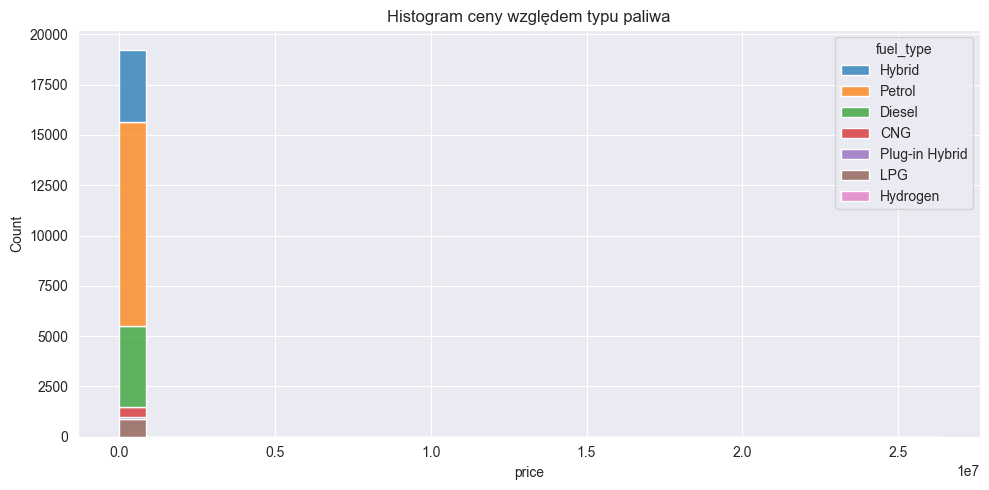

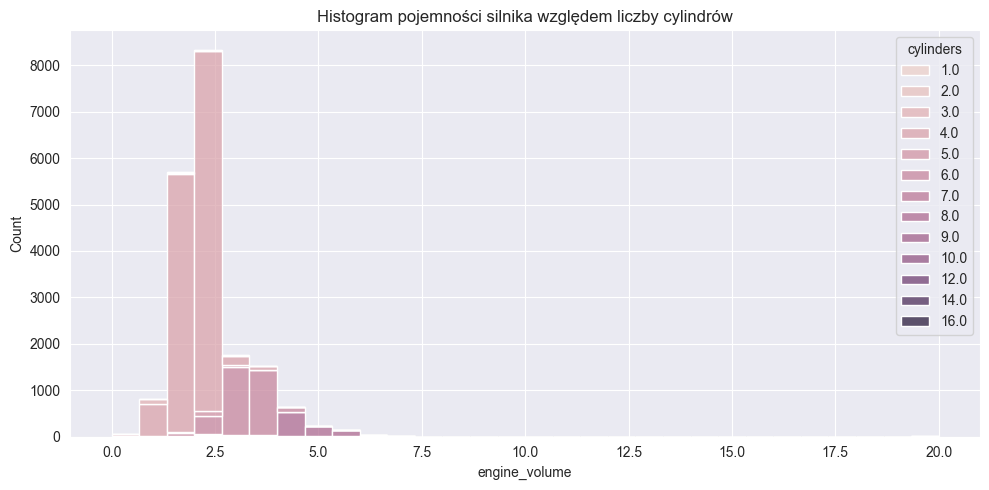

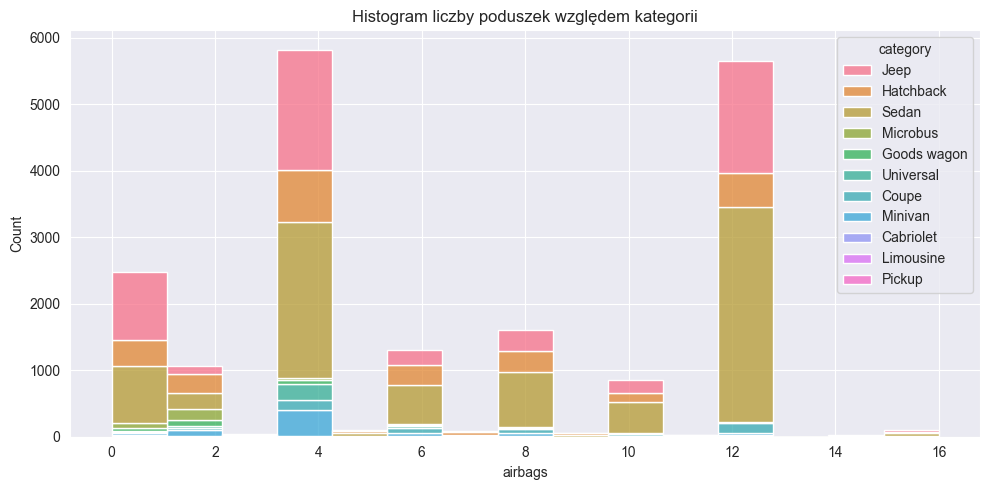

In [75]:
# Konwersja zmiennych jakościowych na string
df = df.applymap(lambda x: str(x) if isinstance(x, str) else x)

# --- 1. Histogram skategoryzowany dla zmiennych zależnych względem zmiennych objaśniających ---

# Przykład: price względem manufacturer
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='price', hue='fuel_type', multiple='stack', bins=30)
plt.title('Histogram ceny względem typu paliwa')
plt.tight_layout()
plt.show()

# Możesz zrobić analogicznie dla innych par:
# engine_volume względem drive_wheels
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='engine_volume', hue='cylinders', multiple='stack', bins=30)
plt.title('Histogram pojemności silnika względem liczby cylindrów')
plt.tight_layout()
plt.show()

# airbags względem category
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='airbags', hue='category', multiple='stack', bins=15)
plt.title('Histogram liczby poduszek względem kategorii')
plt.tight_layout()
plt.show()

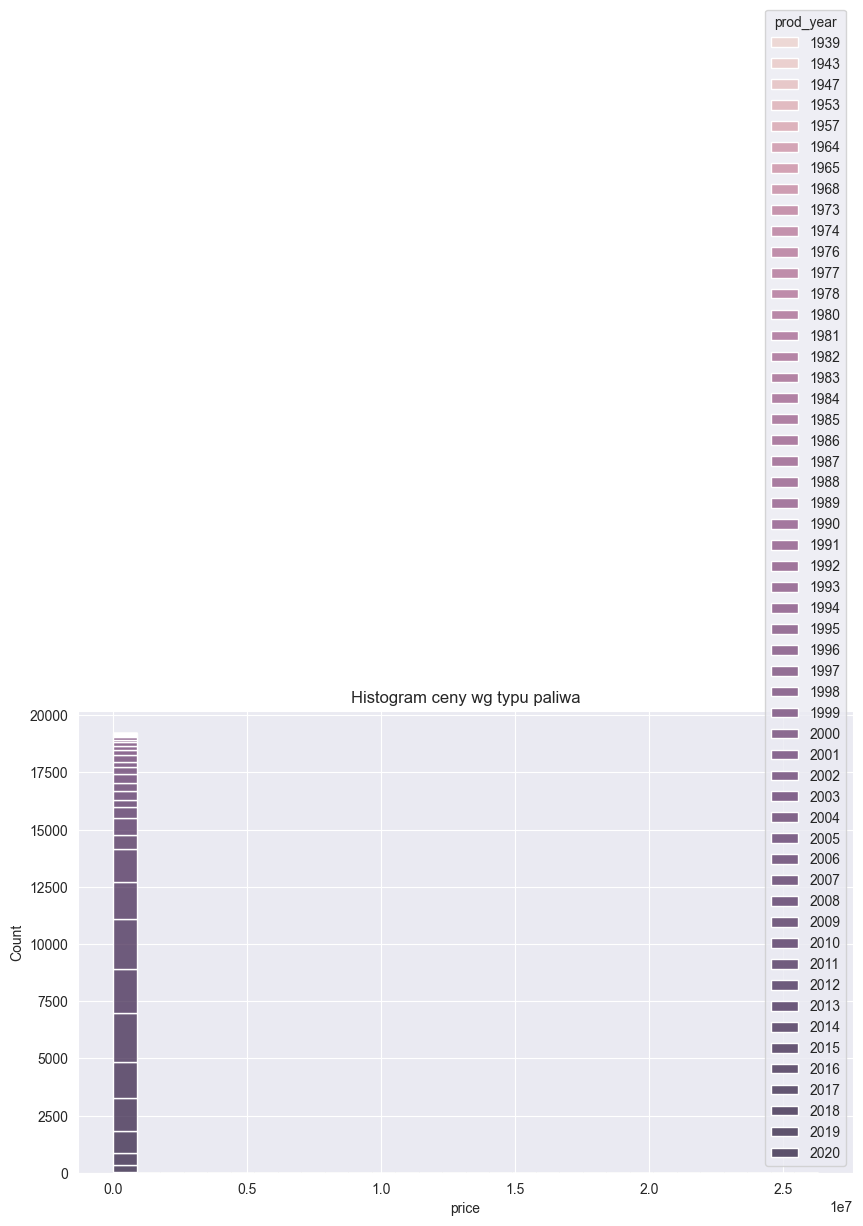

In [98]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='price', hue='fuel_type', multiple='stack', bins=30)
plt.title('Histogram ceny wg typu paliwa')
plt.show()

Wykres średnich w grupach

C:\Users\Belucha\AppData\Local\Temp\ipykernel_10724\4080476769.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x='prod_year', y='price', hue='fuel_type', ci='sd', dodge=True)


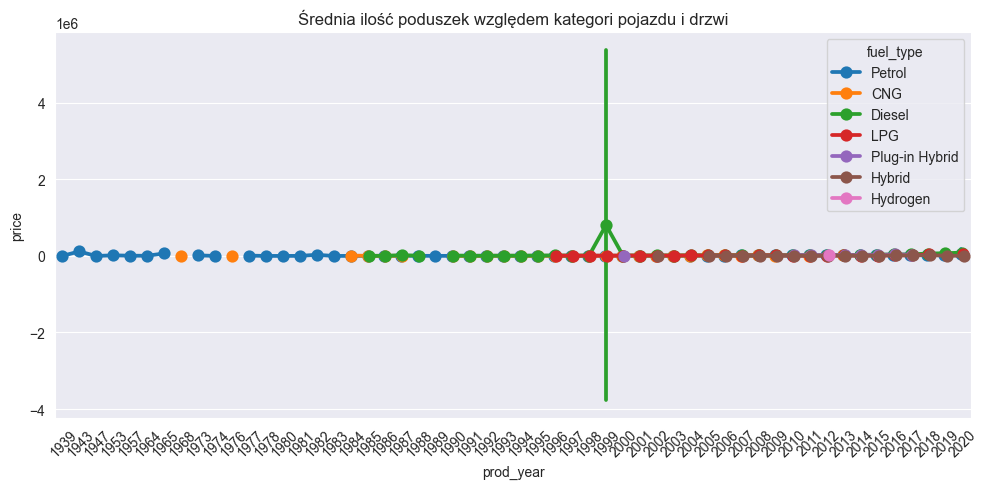

C:\Users\Belucha\AppData\Local\Temp\ipykernel_10724\4080476769.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x='category', y='airbags', hue='doors', ci='sd', dodge=True)


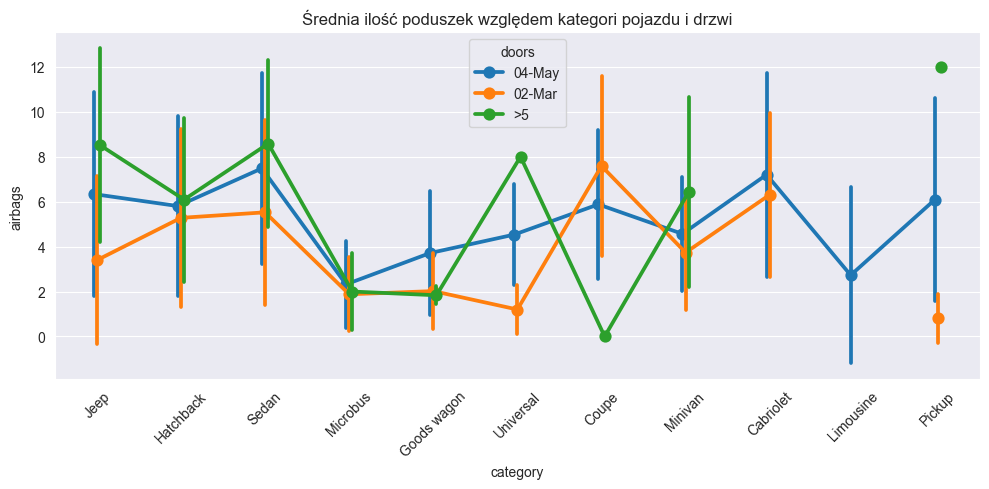

C:\Users\Belucha\AppData\Local\Temp\ipykernel_10724\4080476769.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x='drive_wheels', y='engine_volume', hue='gear_box_type', ci='sd', dodge=True)


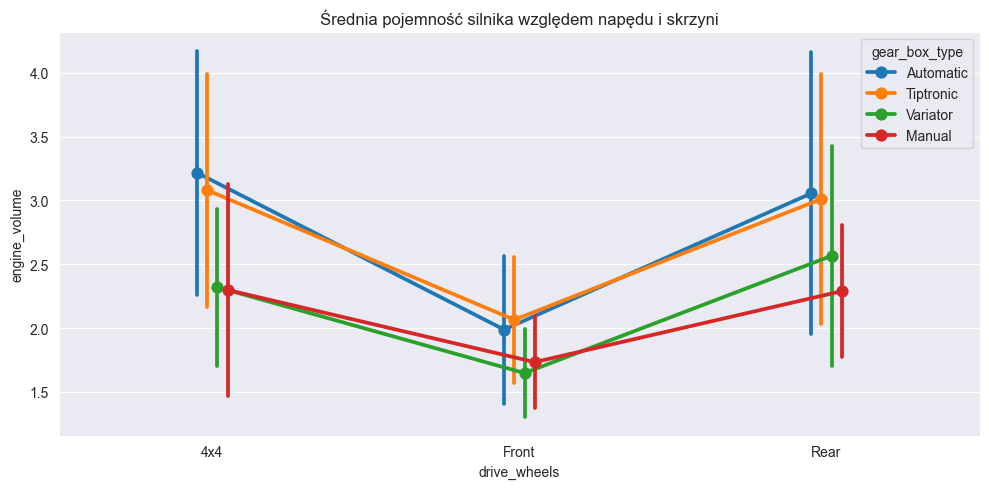

In [100]:
# --- 2. Wykres średnich w grupach (interakcja lub prosta ANOVA) ---
plt.figure(figsize=(10,5))
sns.pointplot(data=df, x='prod_year', y='price', hue='fuel_type', ci='sd', dodge=True)
plt.title('Średnia ilość poduszek względem kategori pojazdu i drzwi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Średnia cena względem producenta i rodzaju paliwa
plt.figure(figsize=(10,5))
sns.pointplot(data=df, x='category', y='airbags', hue='doors', ci='sd', dodge=True)
plt.title('Średnia ilość poduszek względem kategori pojazdu i drzwi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Średnia pojemność silnika względem drive_wheels i gear_box_type
plt.figure(figsize=(10,5))
sns.pointplot(data=df, x='drive_wheels', y='engine_volume', hue='gear_box_type', ci='sd', dodge=True)
plt.title('Średnia pojemność silnika względem napędu i skrzyni')
plt.tight_layout()
plt.show()

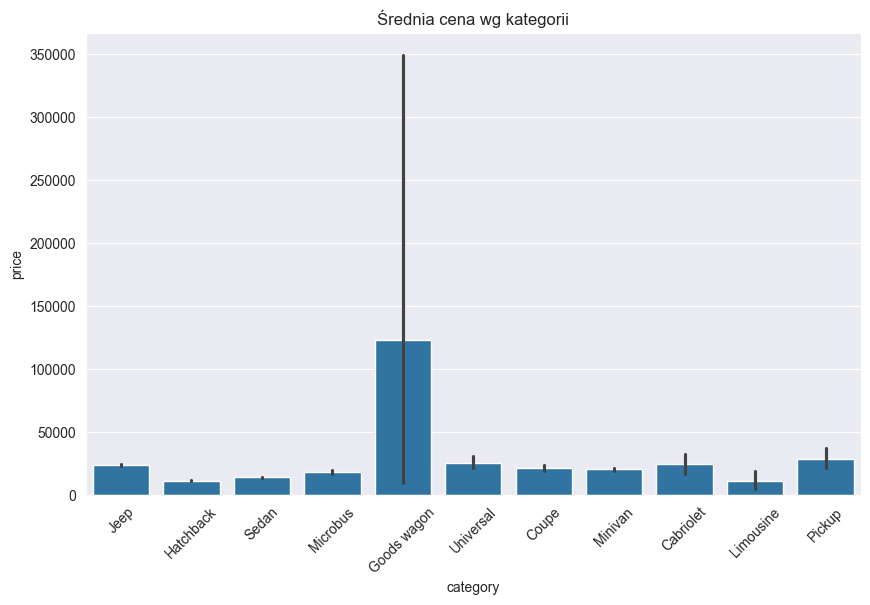

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='category', y='price', estimator='mean')
plt.xticks(rotation=45)
plt.title('Średnia cena wg kategorii')
plt.show()

Macierz korelacji

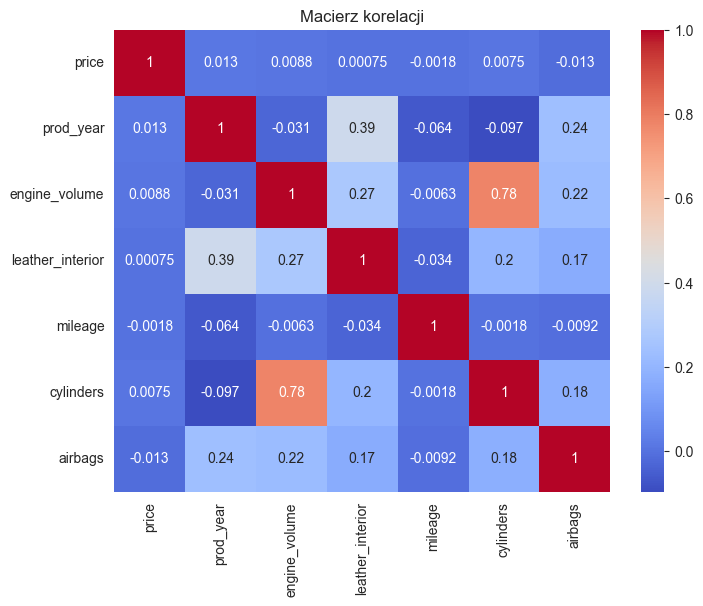

In [83]:
quantitative_cols = ['price','prod_year', 'engine_volume', 'leather_interior', 'mileage', 'cylinders', 'airbags']
corr_matrix = df[quantitative_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

Test Chi^2 (nie działa)

In [46]:
# print("\nTesty Chi^2:")
# for col in qualitative_cols:
#     if col == 'fuel_type':
#         continue
#     contingency = pd.crosstab(df['fuel_type'], df[col])
#
#     try:
#         chi2, p, dof, expected = chi2_contingency(contingency)
#         print(f"{col}: p-value = {p:.4f}")
#     except:
#         print(f"{col}: Nie można obliczyć (zbyt mało danych)")


Testy Chi^2:
manufacturer: p-value = 0.0000
model: p-value = 0.0000
category: p-value = 0.0000
gear_box_type: p-value = 0.0000
drive_wheels: p-value = 0.0000
doors: p-value = 0.0000
wheel: p-value = 0.0000
color: p-value = 0.0000


Wykresy ramka- wąsy dla zmiennych ilościowych z hipotez

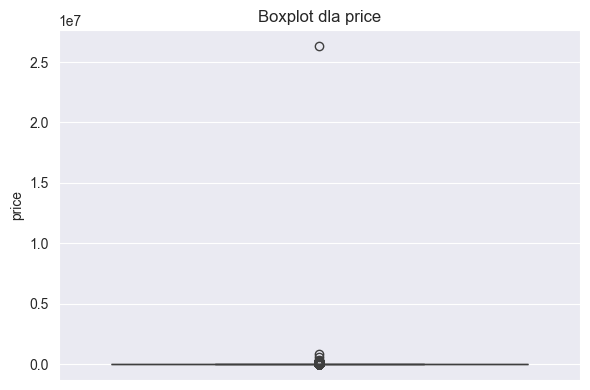

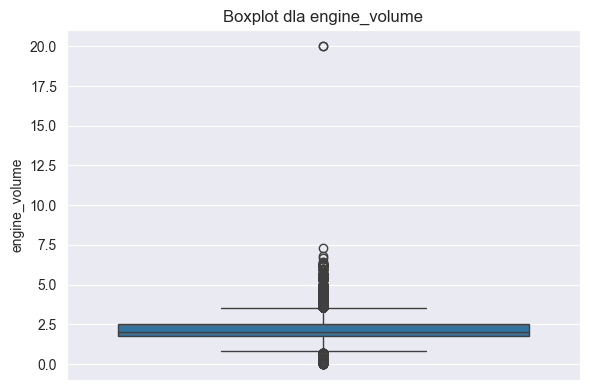

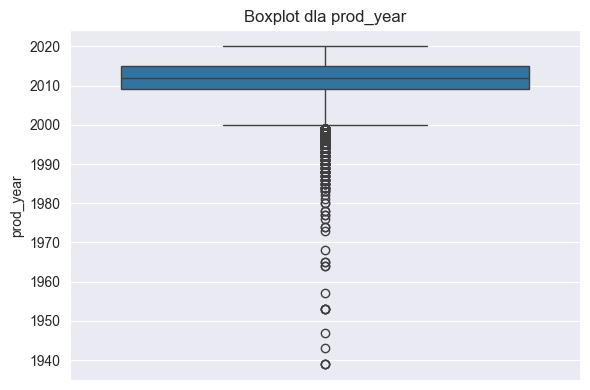

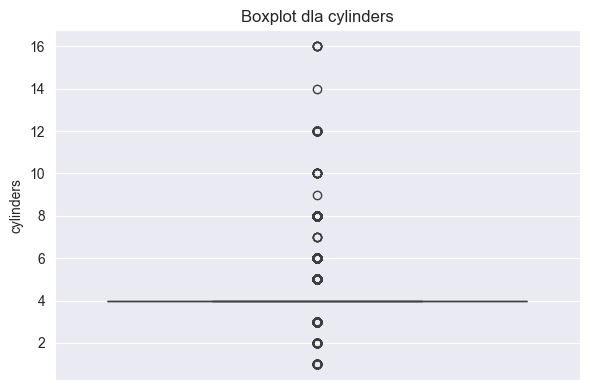

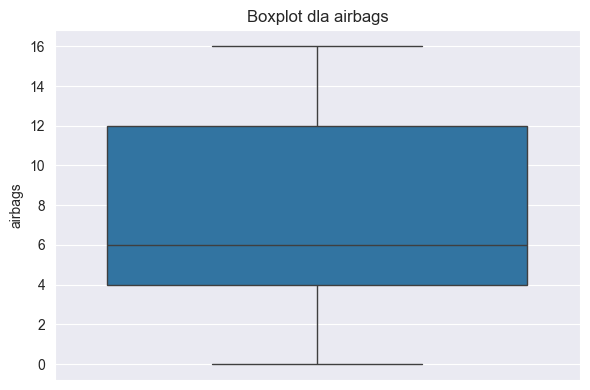

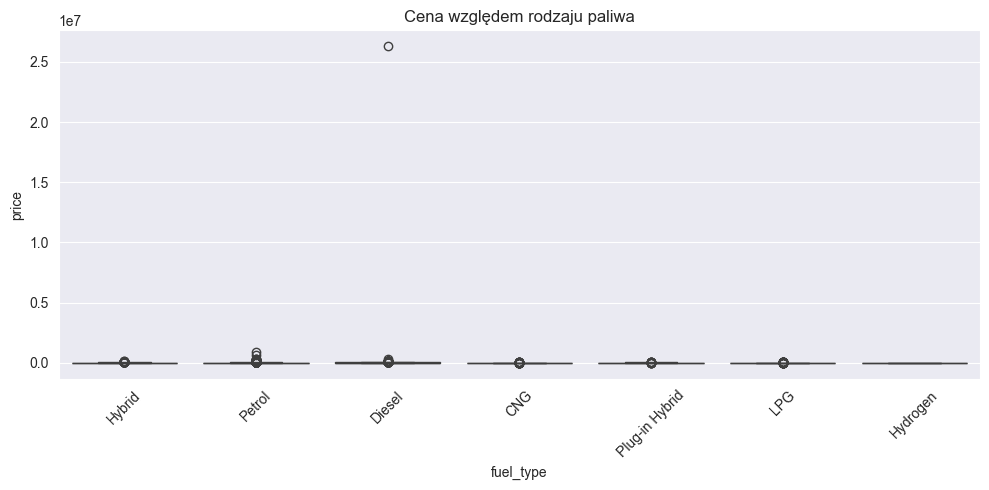

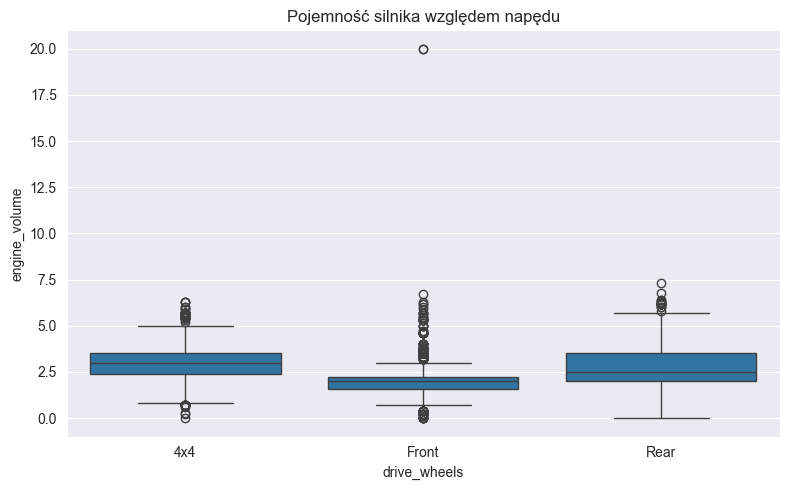

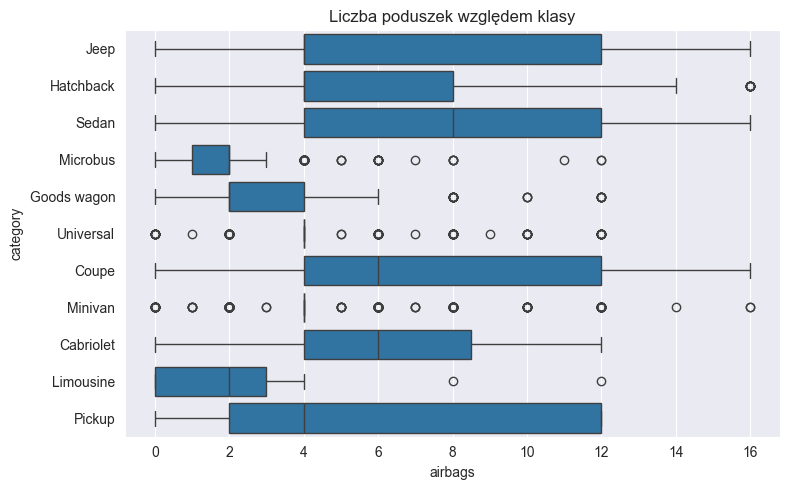

In [81]:
# --- 3. Wykresy ramka-wąsy dla wszystkich zmiennych ilościowych ---

num_vars = ['price', 'engine_volume', 'prod_year', 'cylinders', 'airbags']

for var in num_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=var, data=df)
    plt.title(f'Boxplot dla {var}')
    plt.tight_layout()
    plt.show()

# Dwie pary ilościowa-jakościowa (boxploty skategoryzowane)
# price vs manufacturer
plt.figure(figsize=(10,5))
sns.boxplot(x='fuel_type', y='price', data=df)
plt.title('Cena względem rodzaju paliwa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# engine_volume vs drive_wheels
plt.figure(figsize=(8,5))
sns.boxplot(x='drive_wheels', y='engine_volume', data=df)
plt.title('Pojemność silnika względem napędu')
plt.tight_layout()
plt.show()

# engine_volume vs drive_wheels
plt.figure(figsize=(8,5))
sns.boxplot(x='airbags', y='category', data=df)
plt.title('Liczba poduszek względem klasy')
plt.tight_layout()
plt.show()

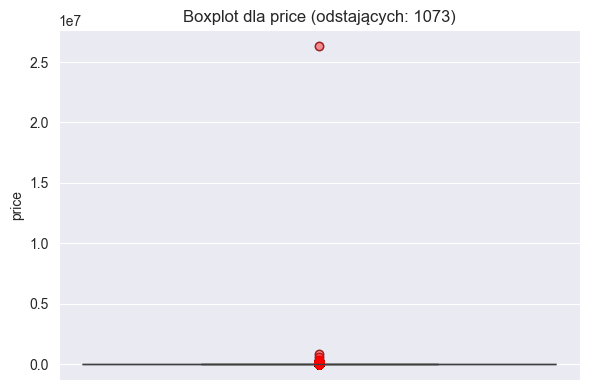


📌 Odstające wartości dla zmiennej 'price':
[47201, 47201, 47205, 47217, 47217, 47217, 47217, 47217, 47217, 47217, 47217, 47217, 47377, 47408, 47408, 47408, 47512, 47531, 47537, 47537, 47669, 47669, 47669, 47669, 47694, 47694, 47757, 47757, 47810, 47957, 47982, 47989, 47989, 47989, 47989, 47989, 47989, 48000, 48048, 48108, 48108, 48196, 48202, 48202, 48261, 48277, 48296, 48296, 48296, 48296, 48403, 48403, 48403, 48534, 48534, 48547, 48566, 48566, 48575, 48575, 48575, 48610, 48610, 48610, 48610, 48610, 48610, 48610, 48610, 48610, 48610, 48610, 48610, 48610, 48610, 48610, 48610, 48610, 48697, 48697, 48867, 48873, 48873, 48873, 48914, 48955, 48998, 48998, 48998, 48998, 48998, 49000, 49058, 49143, 49143, 49165, 49174, 49174, 49237, 49237, 49237, 49237, 49237, 49237, 49237, 49237, 49259, 49293, 49293, 49431, 49459, 49459, 49459, 49550, 49550, 49550, 49550, 49550, 49723, 49751, 49751, 49751, 49751, 49751, 49751, 49751, 49751, 49751, 49751, 49751, 49798, 49798, 49848, 49858, 49858, 49858, 498

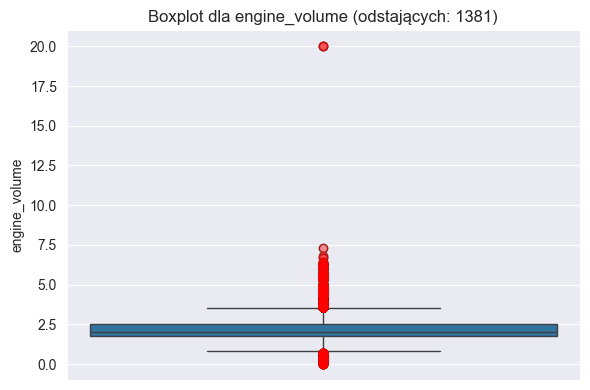


📌 Odstające wartości dla zmiennej 'engine_volume':
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.

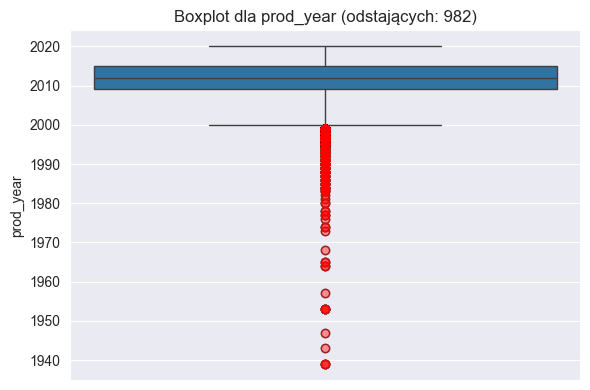


📌 Odstające wartości dla zmiennej 'prod_year':
[1939, 1939, 1939, 1943, 1947, 1953, 1953, 1953, 1953, 1957, 1964, 1964, 1965, 1965, 1968, 1973, 1974, 1974, 1976, 1977, 1977, 1978, 1978, 1980, 1980, 1981, 1982, 1983, 1983, 1983, 1984, 1984, 1984, 1984, 1984, 1985, 1985, 1985, 1985, 1985, 1986, 1986, 1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1987, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1989, 1989, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 199

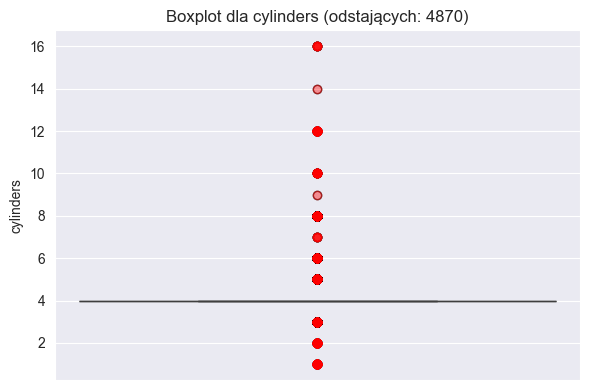


📌 Odstające wartości dla zmiennej 'cylinders':
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 5

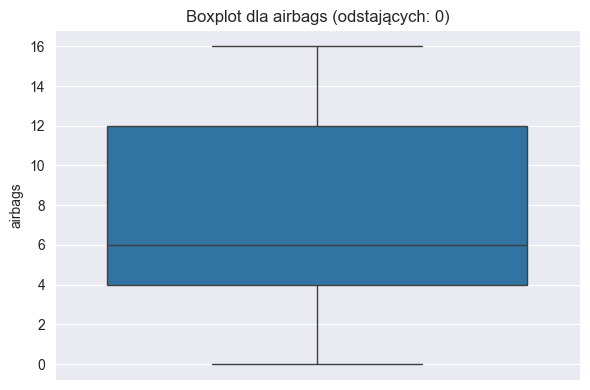


📌 Odstające wartości dla zmiennej 'airbags':
[]
------------------------------------------------------------


In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

num_vars = ['price', 'engine_volume', 'prod_year', 'cylinders', 'airbags']

for var in num_vars:
    plt.figure(figsize=(6, 4))

    # Oblicz Q1, Q3 i IQR
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Znajdź wartości odstające
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]

    # Wykres boxplot
    sns.boxplot(y=var, data=df, showfliers=True)
    plt.title(f'Boxplot dla {var} (odstających: {len(outliers)})')

    # Zaznacz wartości odstające jako czerwone punkty
    for val in outliers:
        plt.plot(0, val, 'ro', alpha=0.4)

    plt.tight_layout()
    plt.show()

    # Wypisz wartości odstające
    print(f"\n📌 Odstające wartości dla zmiennej '{var}':")
    print(outliers.sort_values().to_list())
    print("-" * 60)

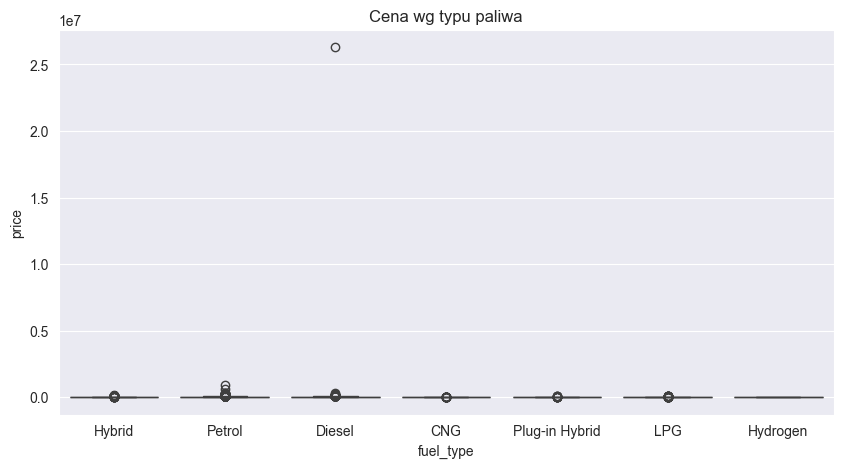

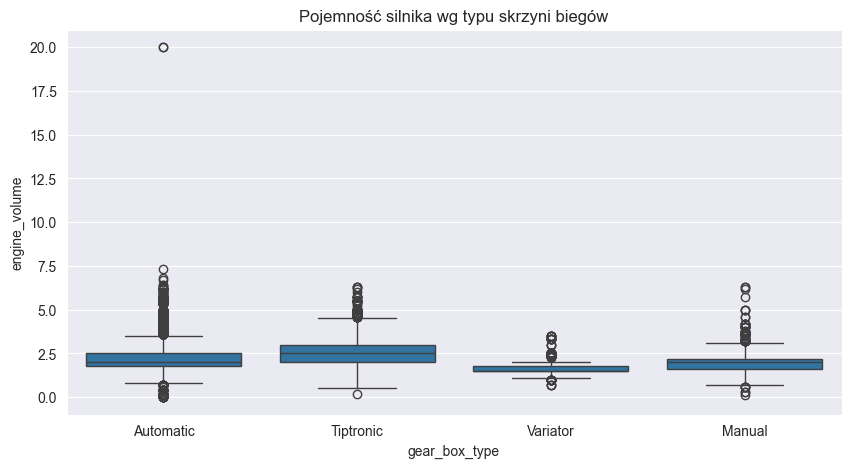

In [47]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='fuel_type', y='price')
plt.title('Cena wg typu paliwa')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='gear_box_type', y='engine_volume')
plt.title('Pojemność silnika wg typu skrzyni biegów')
plt.show()

Test normalności (nie działa)

In [96]:
# print("\nTesty normalności:")
# for col in quantitative_cols:
#     stat, p = normaltest(df[col].dropna())
#     print(f"{col}: p-value = {p:.4f} {'(normalne)' if p > 0.05 else '(nienormalne)'}")


price: p-value = 0.0000
prod_year: p-value = 0.0000
engine_volume: p-value = 0.0000
leather_interior: p-value = 0.0000
mileage: p-value = 0.0000
cylinders: p-value = 0.0000
airbags: p-value = 0.0000


C:\Users\Belucha\PycharmProjects\eksploracja\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19237.
  res = hypotest_fun_out(*samples, **kwds)


Wykres rozrzutu

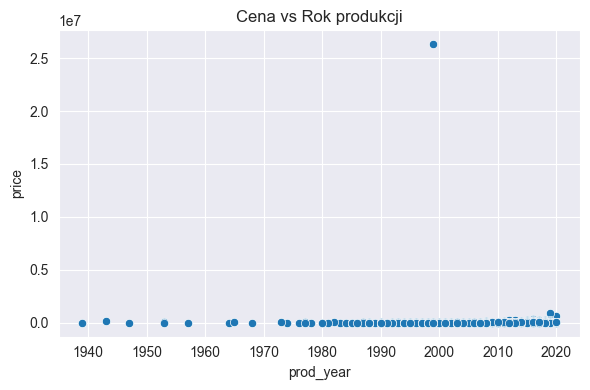

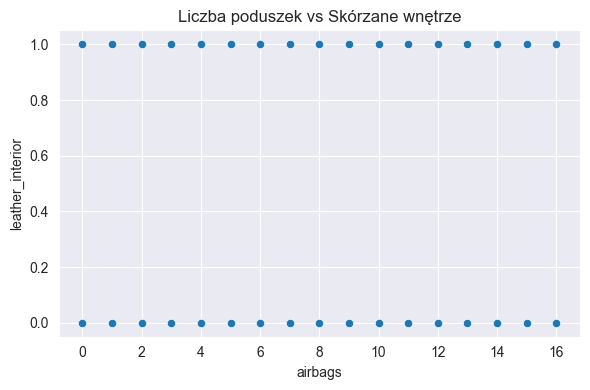

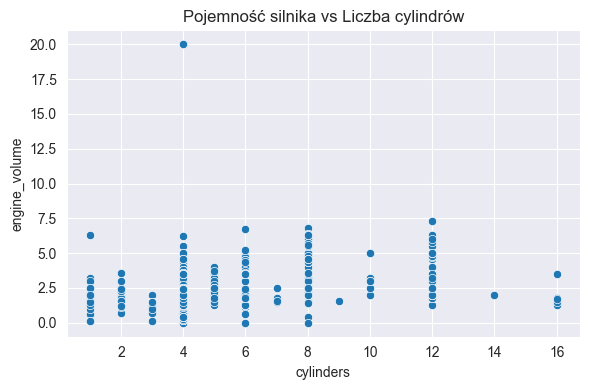

C:\Users\Belucha\AppData\Local\Temp\ipykernel_10724\3178513800.py:29: UserWarning: Glyph 4321 (\N{GEORGIAN LETTER SAN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Belucha\AppData\Local\Temp\ipykernel_10724\3178513800.py:29: UserWarning: Glyph 4334 (\N{GEORGIAN LETTER XAN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Belucha\AppData\Local\Temp\ipykernel_10724\3178513800.py:29: UserWarning: Glyph 4309 (\N{GEORGIAN LETTER VIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Belucha\AppData\Local\Temp\ipykernel_10724\3178513800.py:29: UserWarning: Glyph 4304 (\N{GEORGIAN LETTER AN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Belucha\AppData\Local\Temp\ipykernel_10724\3178513800.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\Belucha\PycharmProjects\eksploracja\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: Us

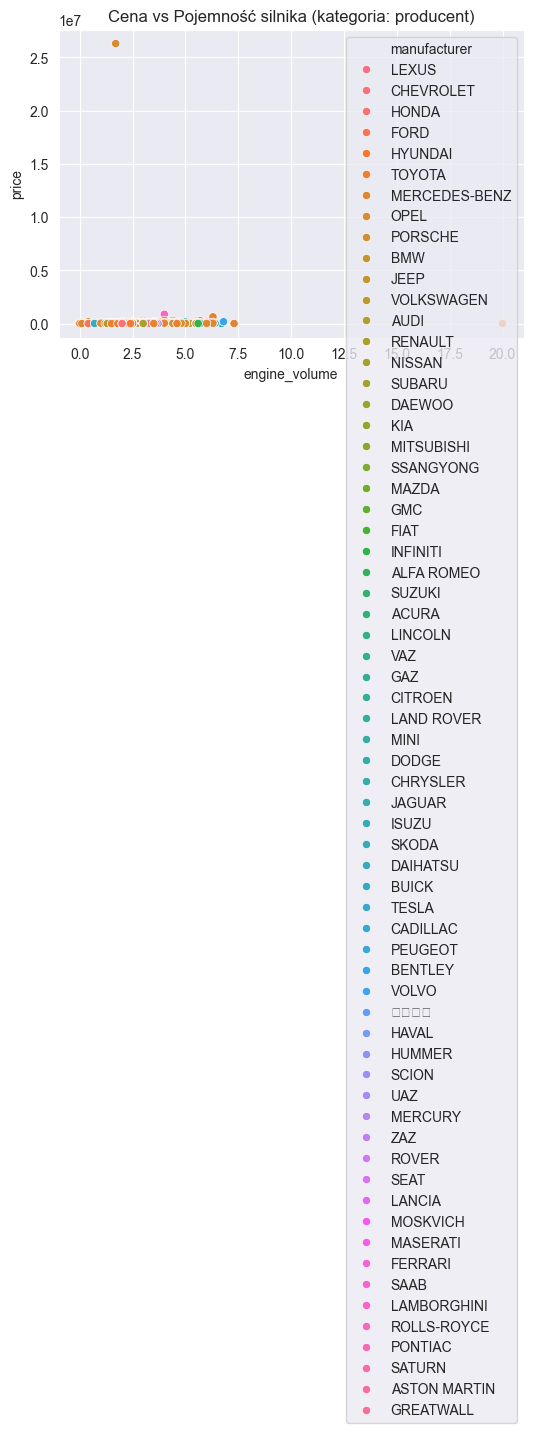

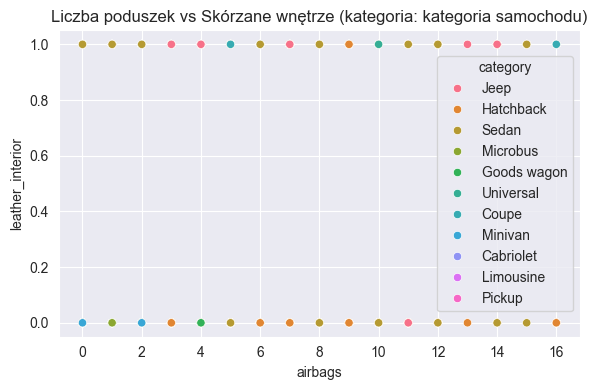

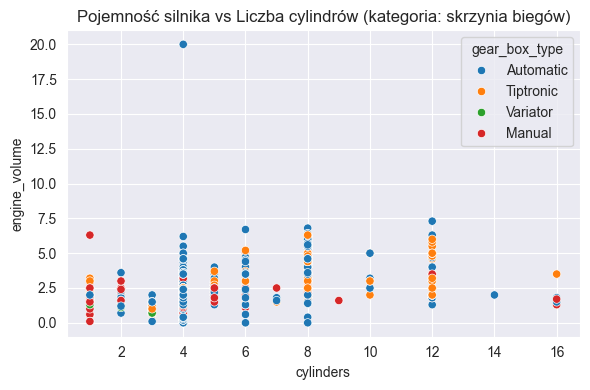

In [85]:
# --- 4. Wykresy rozrzutu dla trzech par zmiennych skorelowanych ---

# price vs prod_year
plt.figure(figsize=(6,4))
sns.scatterplot(x='prod_year', y='price', data=df)
plt.title('Cena vs Rok produkcji')
plt.tight_layout()
plt.show()

# price vs prod_year
plt.figure(figsize=(6,4))
sns.scatterplot(x='airbags', y='leather_interior', data=df)
plt.title('Liczba poduszek vs Skórzane wnętrze')
plt.tight_layout()
plt.show()

# engine_volume vs cylinders
plt.figure(figsize=(6,4))
sns.scatterplot(x='cylinders', y='engine_volume', data=df)
plt.title('Pojemność silnika vs Liczba cylindrów')
plt.tight_layout()
plt.show()

# Wykresy rozrzutu z kategoryzacją względem zmiennej jakościowej
# price vs engine_volume, kategoria: manufacturer
plt.figure(figsize=(6,4))
sns.scatterplot(x='engine_volume', y='price', hue='manufacturer', data=df)
plt.title('Cena vs Pojemność silnika (kategoria: producent)')
plt.tight_layout()
plt.show()

# price vs prod_year, kategoria: fuel_type
plt.figure(figsize=(6,4))
sns.scatterplot(x='airbags', y='leather_interior', hue='category', data=df)
plt.title('Liczba poduszek vs Skórzane wnętrze (kategoria: kategoria samochodu)')
plt.tight_layout()
plt.show()

# engine_volume vs cylinders, kategoria: gear_box_type
plt.figure(figsize=(6,4))
sns.scatterplot(x='cylinders', y='engine_volume', hue='gear_box_type', data=df)
plt.title('Pojemność silnika vs Liczba cylindrów (kategoria: skrzynia biegów)')
plt.tight_layout()
plt.show()


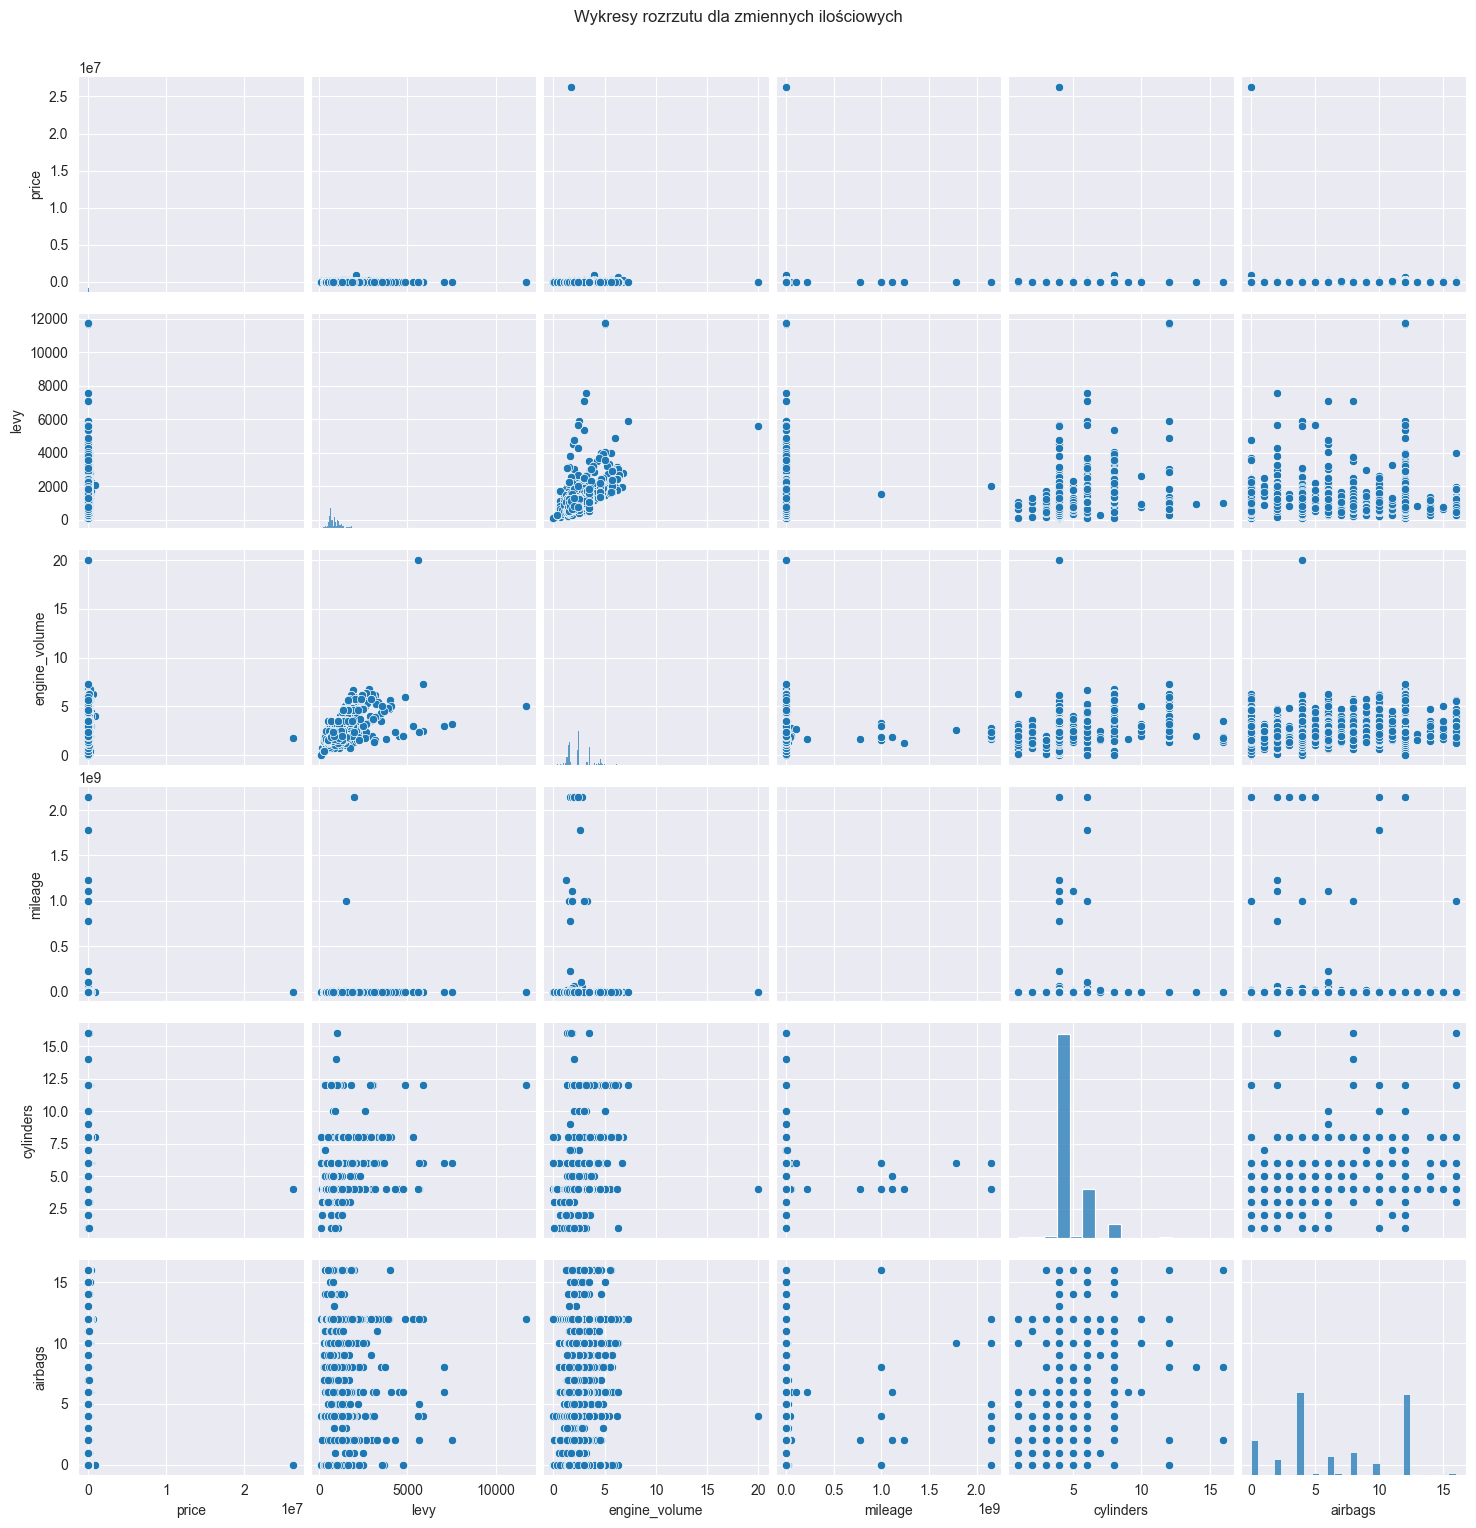

In [49]:
sns.pairplot(df[quantitative_cols])
plt.suptitle("Wykresy rozrzutu dla zmiennych ilościowych", y=1.02)
plt.show()

Skategoryzowany względem zmiennej jakościowej

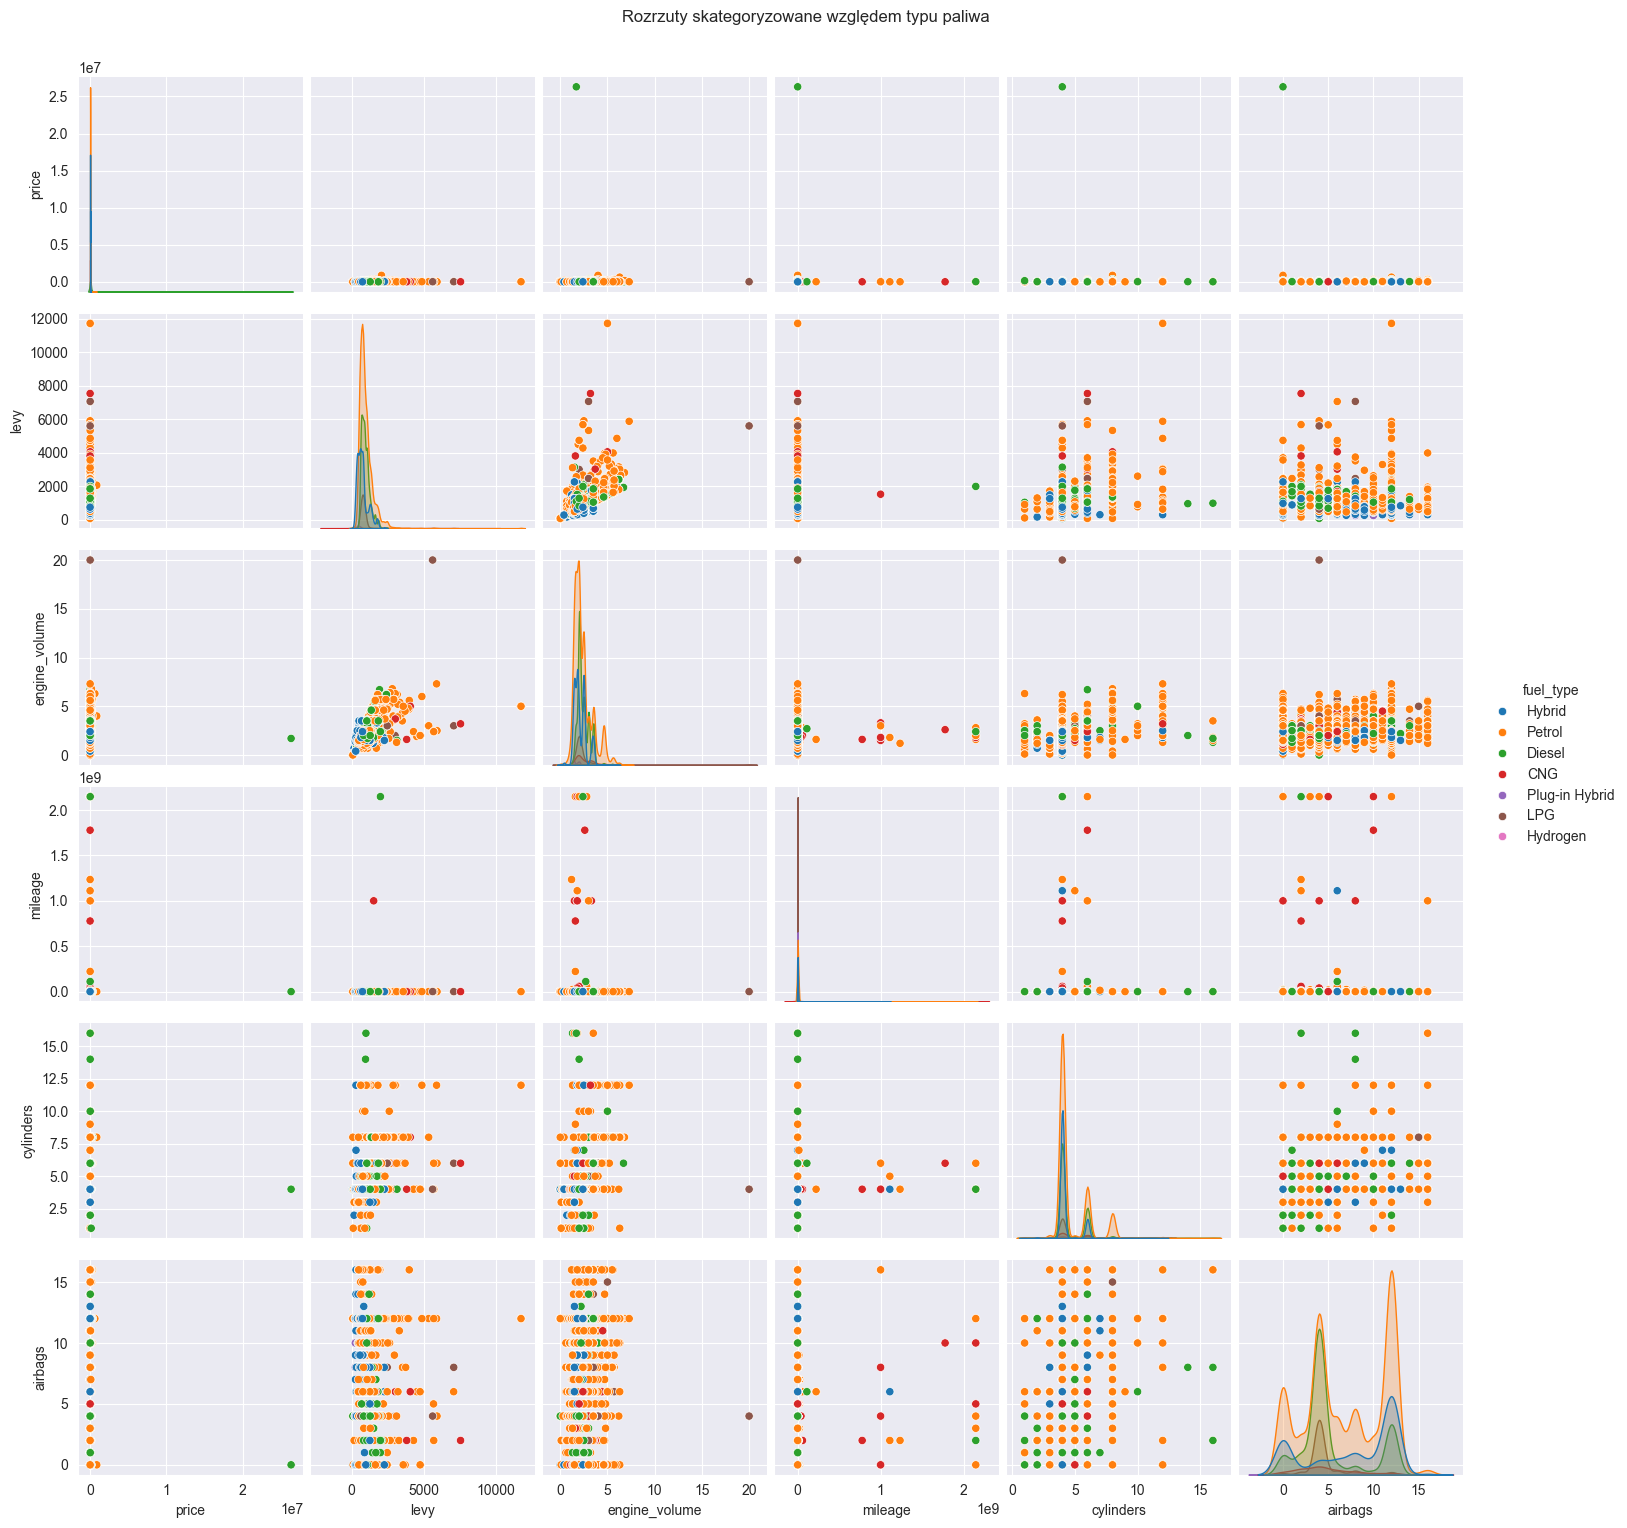

In [50]:
sns.pairplot(df[quantitative_cols + ['fuel_type']], hue='fuel_type')
plt.suptitle("Rozrzuty skategoryzowane względem typu paliwa", y=1.02)
plt.show()

## Drzewa regresyjne dla zmiennych


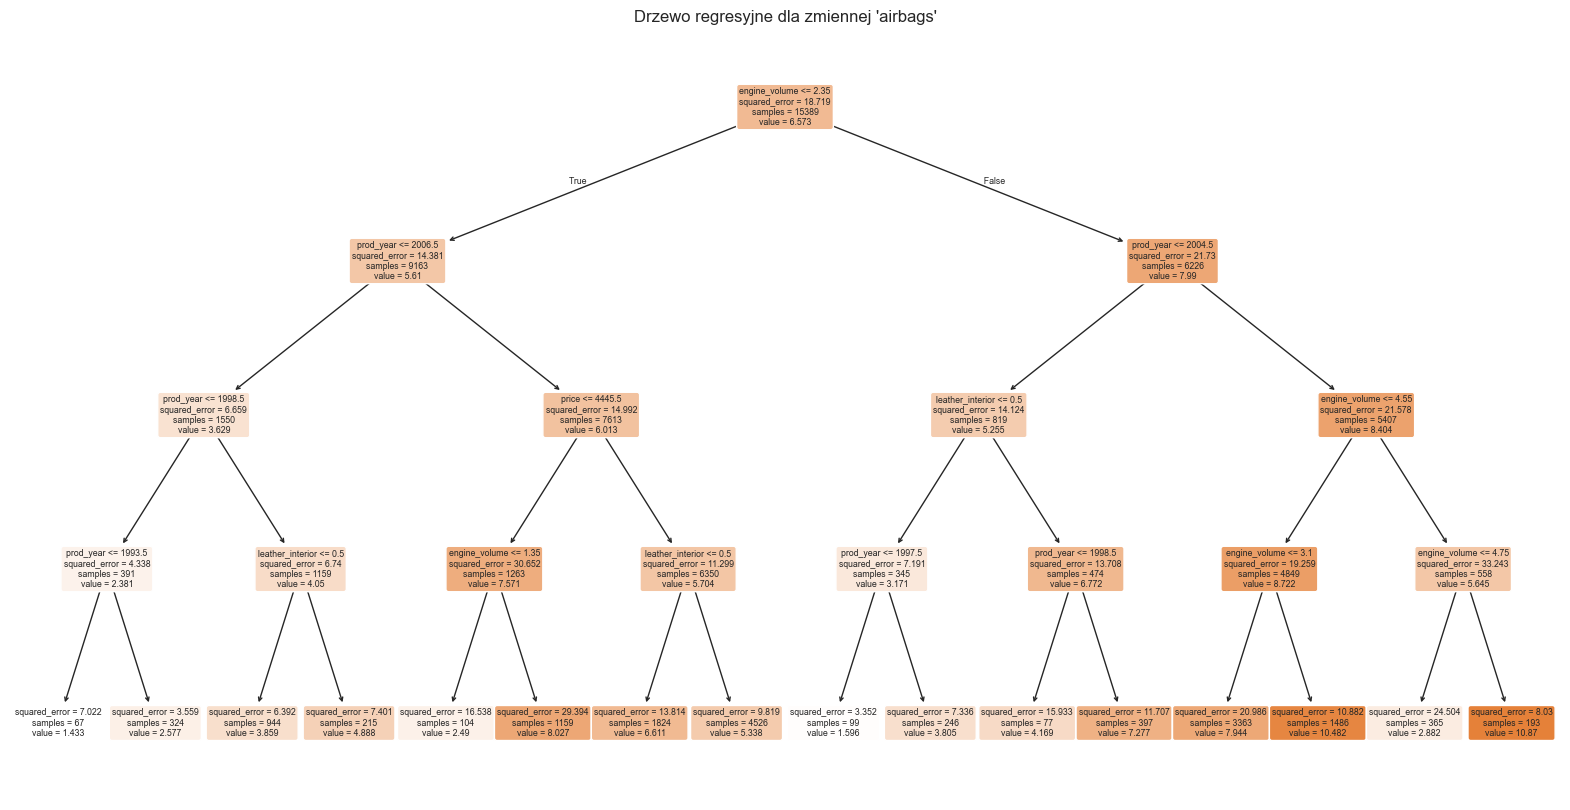

In [112]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Zakładam, że dane są już wczytane i oczyszczone w DataFrame 'df'
# Zmienna zależna
y = df['airbags']

# Zmienne objaśniające (wybieramy tylko liczbowe + te zakodowane wcześniej)
features = ['prod_year', 'engine_volume','leather_interior', 'mileage', 'cylinders', 'price']

# Usuwamy wiersze z brakami danych
X = df[features].copy()
X = X.fillna(0)
y = y.fillna(0)

# Podział na dane treningowe i testowe (opcjonalny)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzenie i trenowanie modelu
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Rysowanie drzewa
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=features, filled=True, rounded=True)
plt.title("Drzewo regresyjne dla zmiennej 'airbags'")
plt.show()

C:\Users\Belucha\AppData\Local\Temp\ipykernel_10724\2740366177.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ważność', y='Cecha', data=feature_importance_df, palette='viridis')


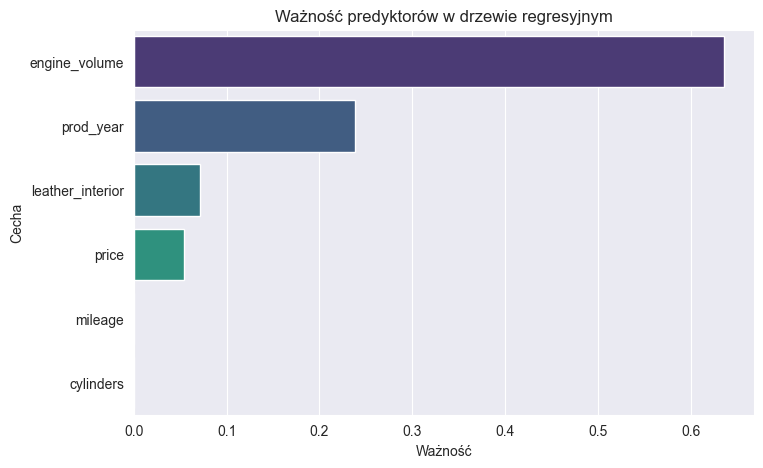

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ważność cech
importances = tree.feature_importances_
feature_importance_df = pd.DataFrame({
    'Cecha': features,
    'Ważność': importances
}).sort_values(by='Ważność', ascending=False)

# Wykres
plt.figure(figsize=(8, 5))
sns.barplot(x='Ważność', y='Cecha', data=feature_importance_df, palette='viridis')
plt.title('Ważność predyktorów w drzewie regresyjnym')
plt.show()

In [114]:
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Koszt resubstytucji i średni błąd kwadratowy (SK) ---
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"📌 Koszt resubstytucji (SK na zbiorze treningowym): {mse_train:.2f}")
print(f"📌 Średni kwadrat błędu (SK) na zbiorze testowym: {mse_test:.2f}")

# --- 2. Współczynnik determinacji R² ---
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"📈 R² na zbiorze treningowym: {r2_train:.3f}")
print(f"📈 R² na zbiorze testowym: {r2_test:.3f}")

# --- 3. Wariancja w liściach drzewa ---
# Pobieramy indeksy liści dla każdego przykładu
leaf_indices = tree.apply(X_train)

# Grupujemy po liściach i liczymy wariancję
leaf_variances = {}
for leaf in np.unique(leaf_indices):
    # wartości y_train przypisane do tego liścia
    values_in_leaf = y_train[leaf_indices == leaf]
    leaf_variances[leaf] = np.var(values_in_leaf)

# Wyświetlenie
print("\n📊 Wariancja zmiennej 'price' w liściach drzewa:")
for leaf, var in leaf_variances.items():
    print(f"  Liść {leaf}: wariancja = {var:.2f}")

📌 Koszt resubstytucji (SK na zbiorze treningowym): 14.29
📌 Średni kwadrat błędu (SK) na zbiorze testowym: 13.74
📈 R² na zbiorze treningowym: 0.237
📈 R² na zbiorze testowym: 0.255

📊 Wariancja zmiennej 'price' w liściach drzewa:
  Liść 4: wariancja = 7.02
  Liść 5: wariancja = 3.56
  Liść 7: wariancja = 6.39
  Liść 8: wariancja = 7.40
  Liść 11: wariancja = 16.54
  Liść 12: wariancja = 29.39
  Liść 14: wariancja = 13.81
  Liść 15: wariancja = 9.82
  Liść 19: wariancja = 3.35
  Liść 20: wariancja = 7.34
  Liść 22: wariancja = 15.93
  Liść 23: wariancja = 11.71
  Liść 26: wariancja = 20.99
  Liść 27: wariancja = 10.88
  Liść 29: wariancja = 24.50
  Liść 30: wariancja = 8.03


## Analiza skupień

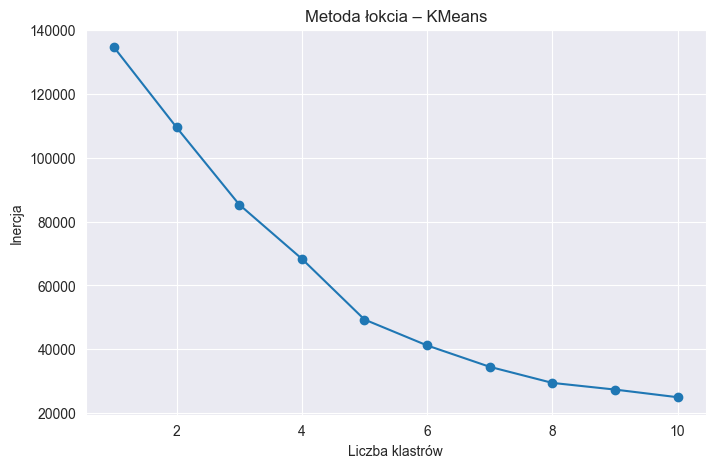

In [119]:


# 🔢 Wybrane zmienne
cluster_cols = ['price', 'engine_volume', 'mileage', 'cylinders', 'airbags', 'prod_year', 'leather_interior']
df_cluster = df[cluster_cols].copy()

# 🧹 Usuwamy braki
df_cluster = df_cluster.dropna()

# ⚖️ Skalowanie zmiennych (bardzo ważne!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# 📈 Wybór optymalnej liczby klastrów metodą łokcia (dla KMeans)
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Liczba klastrów')
plt.ylabel('Inercja')
plt.title('Metoda łokcia – KMeans')
plt.grid(True)
plt.show()

# 📌 Załóżmy, że wybieramy 3 klastry (zmień jeśli łokieć wskazuje coś innego)
kmeans = KMeans(n_clusters=4, random_state=0)
df_cluster['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

Metoda EM

                  price  engine_volume       mileage  cylinders  airbags  \
KMeans_Cluster                                                             
0              13016.89           1.88     241892.42       4.12     5.35   
1              20861.93           2.00     136528.50       4.02     6.35   
2              20022.39           3.61     200261.69       6.55     8.72   
3               6761.88           2.08 1532043011.76       4.53     5.06   

                prod_year  leather_interior  EM_Cluster  
KMeans_Cluster                                           
0                 2007.16              0.01        0.02  
1                 2013.17              1.00        1.03  
2                 2010.22              0.97        1.94  
3                 1999.24              0.18        0.00  


              price  engine_volume    mileage  cylinders  airbags  prod_year  \
EM_Cluster                                                                     
0          13335.58           1.9

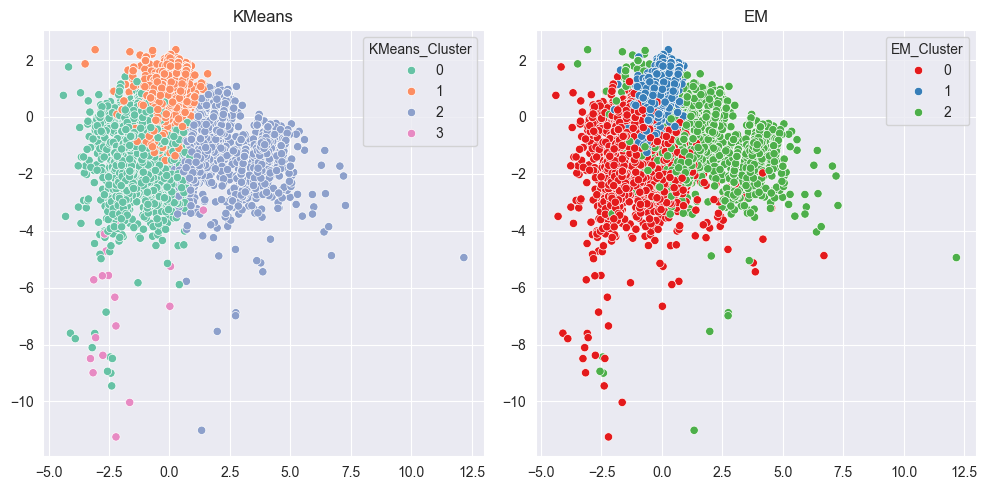

In [120]:
# 🎯 Analiza skupień metodą EM (Gaussian Mixture)
gm = GaussianMixture(n_components=3, random_state=0)
df_cluster['EM_Cluster'] = gm.fit_predict(X_scaled)

# 🔍 Podsumowanie
print(df_cluster.groupby('KMeans_Cluster').mean())
print("\n")
print(df_cluster.groupby('EM_Cluster').mean())

# 🔳 Wizualizacja klastrów (np. 2D PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cluster['KMeans_Cluster'], palette='Set2')
plt.title("KMeans")

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cluster['EM_Cluster'], palette='Set1')
plt.title("EM")

plt.tight_layout()
plt.show()